# Precipitation Analysis - Part II!
- In this assignment, you'll use the same data as your last assignment
<br><br>
- Only instead of primarily considering data JUST at the approximate location of campus 
<br><br>
- We'll instead consider United-States-wide data, *spatially* - so now we're working with more dimensions, yes?
<br><br>
- This will include doing additional logical/comparisons operations
<br><br>
- AND creating maps of the results of those operations!

#### Import xarray as xr, numpy as np, and pyplot from matplotlib as plt

In [4]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

#### Let's access our dataset remotely without downloading it!  *I GIVE YOU THE CODE FOR THIS*

- this data is on an OpeNDAP server, which allows us to remotely access it and use it without downloading it
- more info on OpeNDAP: https://psl.noaa.gov/data/gridded/using_dods.html
- OpeNDAP is used by NOAA, NASA, etc.
<br><br>
- pass address of data on server into an Xarray open function, just like you would a usual, local-to-you file path (*I'll give you the code since you don't know Xarray yet!*)
<br><br>
- address of data: 'https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_us_precip/RT/precip.V1.0.2020.nc'
   - seems to be a typo on the data webpage of the OpeNDAP link - so we'll use above
<br><br>
- having issues with this?  Make sure Netcdf4 module has been installed! Still issues?  *Post on Slack!*

In [5]:
import xarray as xr
# open_dataarray is one of the main functions in Xarray to open a Netcdf file!
remote_data = xr.open_dataarray('precip.V1.0.2020.nc')

#### Prints out information about the data in this Netcdf file.  *I GIVE YOU THE CODE FOR THIS*
- Remember: Netcdf is a binary file format, and we'll work a lot with it in future using the Xarray package, especially for *spatial* data!

<xarray.DataArray 'precip' (time: 366, lat: 120, lon: 300)>
[13176000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Attributes:
    long_name:     Daily Accumulated Precipitation
    valid_range:   [  0. 400.]
    units:         mm
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Unified Gauge-Based Analysis of Daily Precipitation ov...
    level_desc:    Surface
    statistic:     Daily Accumulation
    parent_stat:   Observation
    actual_range:  [  0.      274.80292]
(array([4.920733e+06, 5.554600e+04, 8.446000e+03, 1.742000e+03,
       4.370000e+02, 1.480000e+02, 4.100000e+01, 1.800000e+01,
       4.000000e+00, 1.000000e+00]), array([  0.      ,  27.480291,  54.960583,  82.44087 , 109.921165,
       137.40146 , 164.88174 , 192.36205 

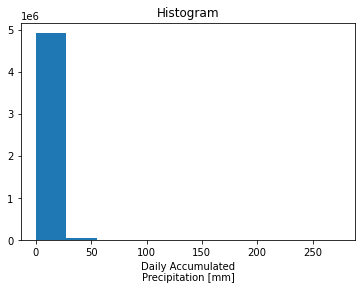

In [7]:
# Prints
print(remote_data)
print(remote_data.plot())
print(remote_data.coords)

## *FILL IN THIS Q FROM YOUR LAST ASSIGNMENT, YOU'LL WANT TO REMIND YOURSELF OF THE COORDINATES/DIMENSIONS*:  
#### Let's start thinking more about spatial data (much more to follow in next week's lessons!) Based on the metadata printed out above:
 - (a.)  what are units of this data - precip? 
<br><br>
 - (b.)  what are the coordinates of this data?  
    - You *MUST* include a description of the direction of the order of each of the spatial coordinates (northward? southward? eastward? westward?)

a) millimeters

b) Starting at an origin (20.12, 230.1) in the southwest, the coordinates form a grid going to the northeast and endnig at (49.88, 304.9)

#### Save the coordinate variables of lat, lon, and time each to their own variable (technically, each a data array) *I GIVE YOU THE CODE FOR THIS*

In [8]:
lat2 = remote_data['lat'] # these are *coordinate* variables in the Netcdf file
print(lat2)
lon2 = remote_data['lon']
print(lon2)
times2 = remote_data['time']

<xarray.DataArray 'lat' (lat: 120)>
array([20.125, 20.375, 20.625, 20.875, 21.125, 21.375, 21.625, 21.875, 22.125,
       22.375, 22.625, 22.875, 23.125, 23.375, 23.625, 23.875, 24.125, 24.375,
       24.625, 24.875, 25.125, 25.375, 25.625, 25.875, 26.125, 26.375, 26.625,
       26.875, 27.125, 27.375, 27.625, 27.875, 28.125, 28.375, 28.625, 28.875,
       29.125, 29.375, 29.625, 29.875, 30.125, 30.375, 30.625, 30.875, 31.125,
       31.375, 31.625, 31.875, 32.125, 32.375, 32.625, 32.875, 33.125, 33.375,
       33.625, 33.875, 34.125, 34.375, 34.625, 34.875, 35.125, 35.375, 35.625,
       35.875, 36.125, 36.375, 36.625, 36.875, 37.125, 37.375, 37.625, 37.875,
       38.125, 38.375, 38.625, 38.875, 39.125, 39.375, 39.625, 39.875, 40.125,
       40.375, 40.625, 40.875, 41.125, 41.375, 41.625, 41.875, 42.125, 42.375,
       42.625, 42.875, 43.125, 43.375, 43.625, 43.875, 44.125, 44.375, 44.625,
       44.875, 45.125, 45.375, 45.625, 45.875, 46.125, 46.375, 46.625, 46.875,
       47.125, 4

#### Convert each of the three data arrays into a NumPy array  *I GIVE YOU THE CODE FOR THIS*
- Since you haven't learned Xarray yet, let's get data into a format you know how to work with!

In [9]:
precip = remote_data.values # nifty function that converts the Xarray data structure into a NumPy array
lat = lat2.values 
lon = lon2.values

## *FILL IN THIS Q FROM YOUR LAST ASSIGNMENT, YOU'LL WANT TO REMIND YOURSELF OF THE COORDINATES/DIMENSIONS*:  
####  Evaluating dimensions!
 - (a.) Evaluate and print the shape of each of these three NumPy arrays: lat, lon, and precip
<br><br>
 - (b.) What are the dimensions of precip, physically, based on your answer to (a.), and your work in Q1?  <br><br>
 - (c.) And what *order* are the dimensions in?

In [11]:
print(f'A: Shapes\n\tLat: {np.shape(lat)}\n\tLon: {np.shape(lon)}\n\tPrecip: {np.shape(precip)}\n')

A: Shapes
	Lat: (120,)
	Lon: (300,)
	Precip: (366, 120, 300)



B.
Time, latitude, longitude

C.
Time, latitude, longitude

## *HERE BEGINS NEW QUESTIONS JUST FOR THIS ASSIGNMENT*: 
#### (1)  As you may have noticed if you've played around with outputting some precip values, our array consists of NaNs in the ocean locations
- (a.) create a mask that identifies and masks out NaNs, and save your masked variable to a new variable - *you learned a formal way to do this in your lessons this week!*
<br><br>
- (b.) print out the masked variable, the mask itself, and your original data
<br><br>
- (c.) this is prep for the next question, when we're considering data in all locations, not just at UIUC where there is no missing data, and don't want to deal with NaNs

In [24]:
# A
masked = np.ma.masked_invalid(precip)

#B
print(f'Masked precip:\n{masked}\nMask:\n{masked.mask}\nOriginal:\n{precip}')

Masked precip:
[[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 ...

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- -

#### (2)  Now, calculate and plot each of the following (on a 2D, shaded contour plot that includes a map), USING YOUR MASKED DATA FROM 1(a)
  - (a.) the average Jan precip at each location 
<br><br>
  - (b.) cumulative precipitation in 2020 at each location - i.e., the TOTAL precipitation that fell during the year 2020 at each location
<br><br>
  - (c.) the number of days in 2020 when no precipitation was recorded, at each location  

***Do not use any for loops!***

*Specific plotting requirements. For each plot, you should*:
 - use object-oriented plotting 
 - create a filled contour plot of the given quantity that you calculate earlier in this Q
 - on a *map* using Cartopy 
 - with a colorbar, using a colormap of your choice that you explicitly set
 - and labels for colorbar, plot axes, title, etc.